Модель рекуррентной сети с цепью нейросетевых моделей долгой кратковременной памяти c функцией активации гиперболический тангенс

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from math import sin,tan

In [13]:
seqLen = 10

batchSize = 5

trainSize = 0.50
dataRange = np.linspace(0,500,500)
#data=[[0.],[1.]]
#for i in  range(50-2):
#     data.append([data[i][0]+data[i+1][0]])

data = [[2**sin(i)] for i in dataRange ]
line=int(trainSize*len(data))
trainData = data[:line]
testData = data[line:]

trainTarget = trainData[seqLen:]

testDataRange = dataRange[line:]

train = tf.keras.utils.timeseries_dataset_from_array(
      data=trainData,
      targets=trainTarget,
      sequence_length=seqLen,
      batch_size=batchSize)

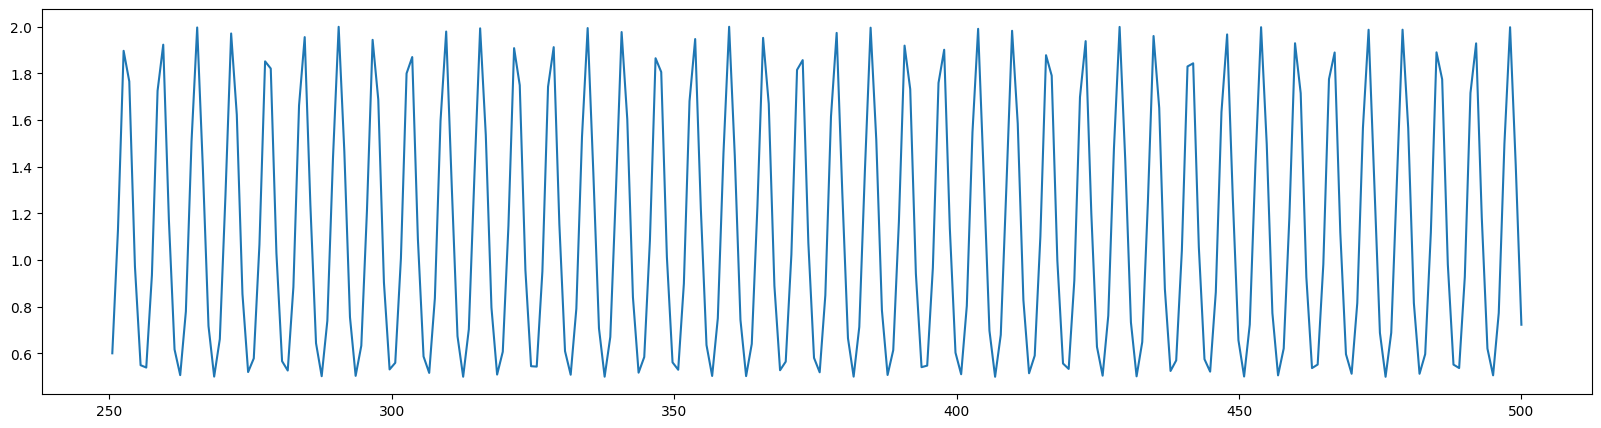

In [14]:
plt.plot(testDataRange, testData)

In [15]:
class LSTM:
    def __init__(self):
        self.Model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(seqLen,1)),
                    tf.keras.layers.LSTM(15,activation="tanh",recurrent_activation="sigmoid", return_sequences = False),
                    tf.keras.layers.Dense(units=1)
                    ])
        self.compile()
        
    def compile(self):
        self.Model.compile(loss=tf.losses.Huber(),
            optimizer=tf.optimizers.Adam(learning_rate=0.001),
            metrics=[tf.metrics.MeanAbsoluteError()])

        self.Model.build()
        self.Model.summary()
        
    def train(self, data, epochs = 9):
        for _ in range(epochs):
            self.Model.fit(data,
                          validation_data=None
                          )
    def test(self, test):
        rez = [test[i][0] for i in range(seqLen)]
        length = len(test) - seqLen
        start = [test[:seqLen]]
        for i in tqdm(range(length)):
            next = float(self.Model.predict(start, verbose = 0)[0][0])
            start[0] = start[0][1:]
            start[0].append([next])
            rez.append(next)
            
        return rez
        

In [16]:
L = LSTM()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 15)                1020      
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [20]:
L.train(train,epochs=10)


48/48 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0707


In [21]:
predict = L.test(testData)


100%|██████████| 240/240 [00:24<00:00,  9.76it/s]


[1.9712713886087356]
1.8829643726348877


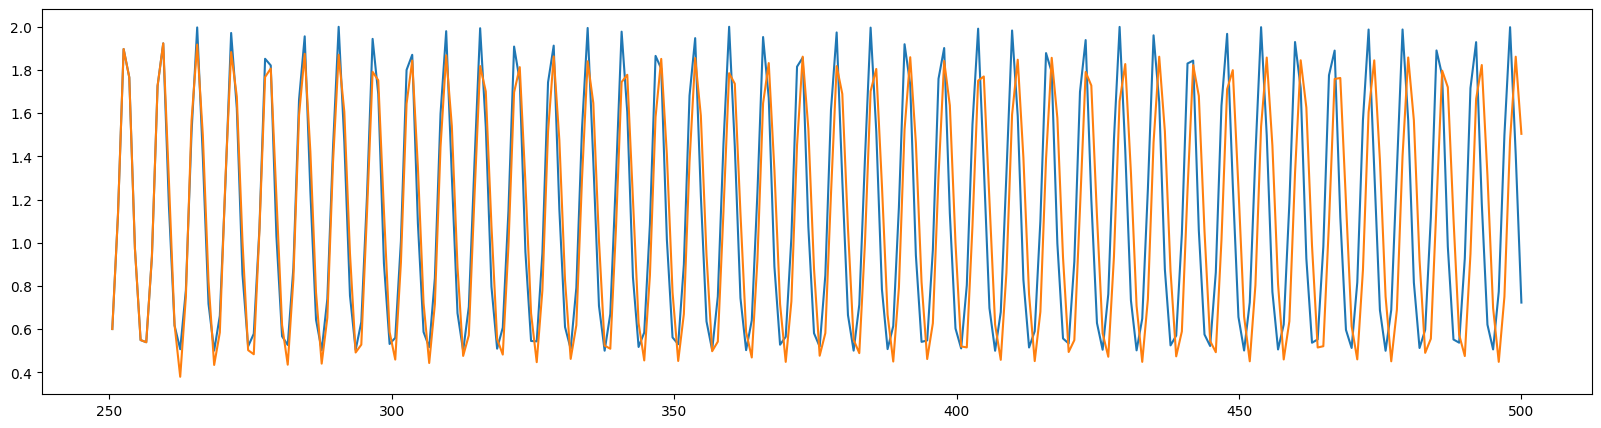

In [22]:
plt.rcParams["figure.figsize"] = (20,5)
print( testData[21])
print(predict[21])
plt.plot(testDataRange, testData)
plt.plot(testDataRange, predict)